![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [4]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        332.000000       332.000000         332.000000   332.000000
mean          44.021084        17.153012         200.975904  4206.475904
std            5.452462         1.960275          14.035971   806.361278
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.700000        17.300000         197.000000  402

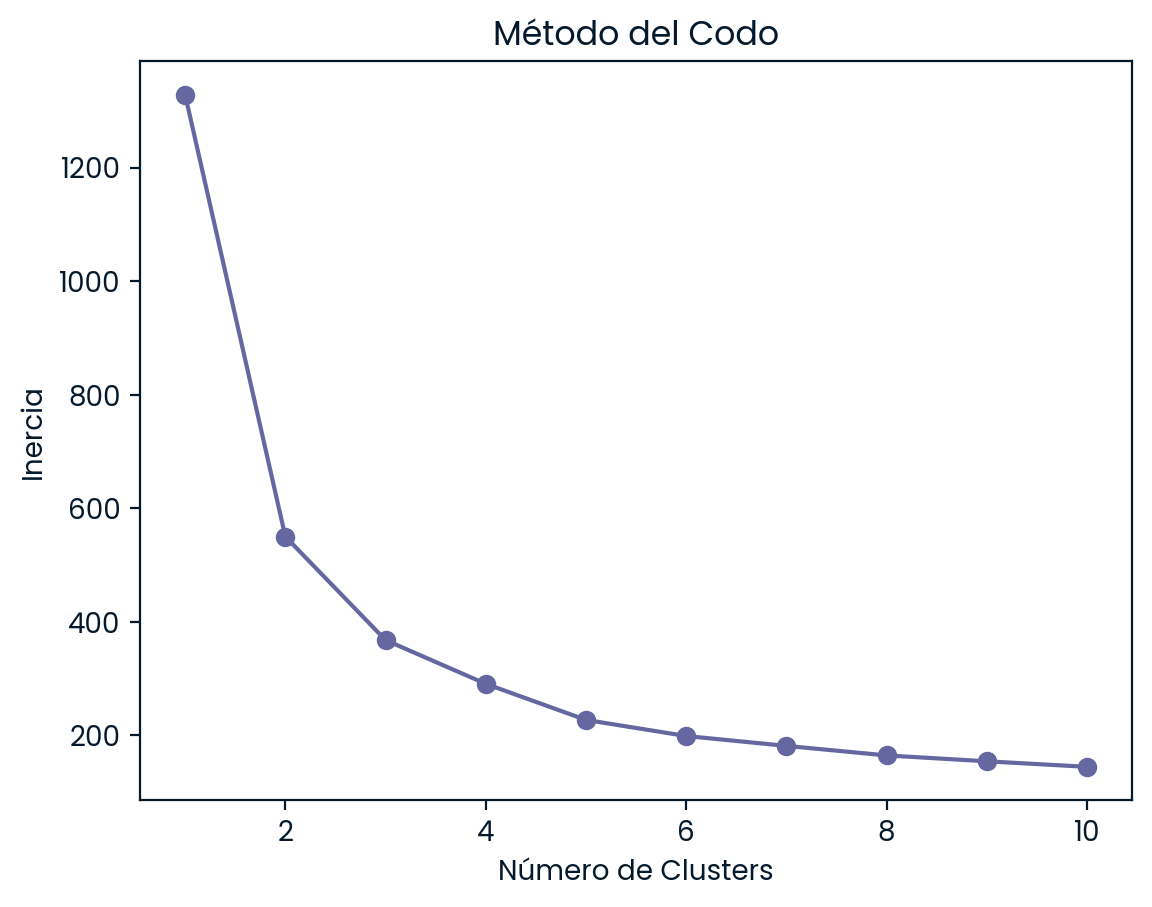

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000


In [5]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
penguins_df = pd.read_csv("penguins.csv")

# Inspeccionar el dataset
print(penguins_df.info())
print(penguins_df.describe())

# Preprocesamiento: eliminar columnas no numéricas y manejar valores faltantes
# Si 'sex' tiene valores faltantes o no deseados, lo excluimos ya que no se usará en el clustering.
penguins_numeric = penguins_df.drop(columns=['sex']).dropna()

# Escalar los datos
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric)

# Determinar un número razonable de clusters
# Puedes usar el método del codo para encontrar el número óptimo de clusters.
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(penguins_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Basado en el gráfico del codo, elegimos un número de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_df['cluster'] = kmeans.fit_predict(penguins_scaled)

# Calcular las estadísticas de los clusters
stat_penguins = penguins_df.groupby('cluster').mean()

# Mostrar el DataFrame resultante
print(stat_penguins)


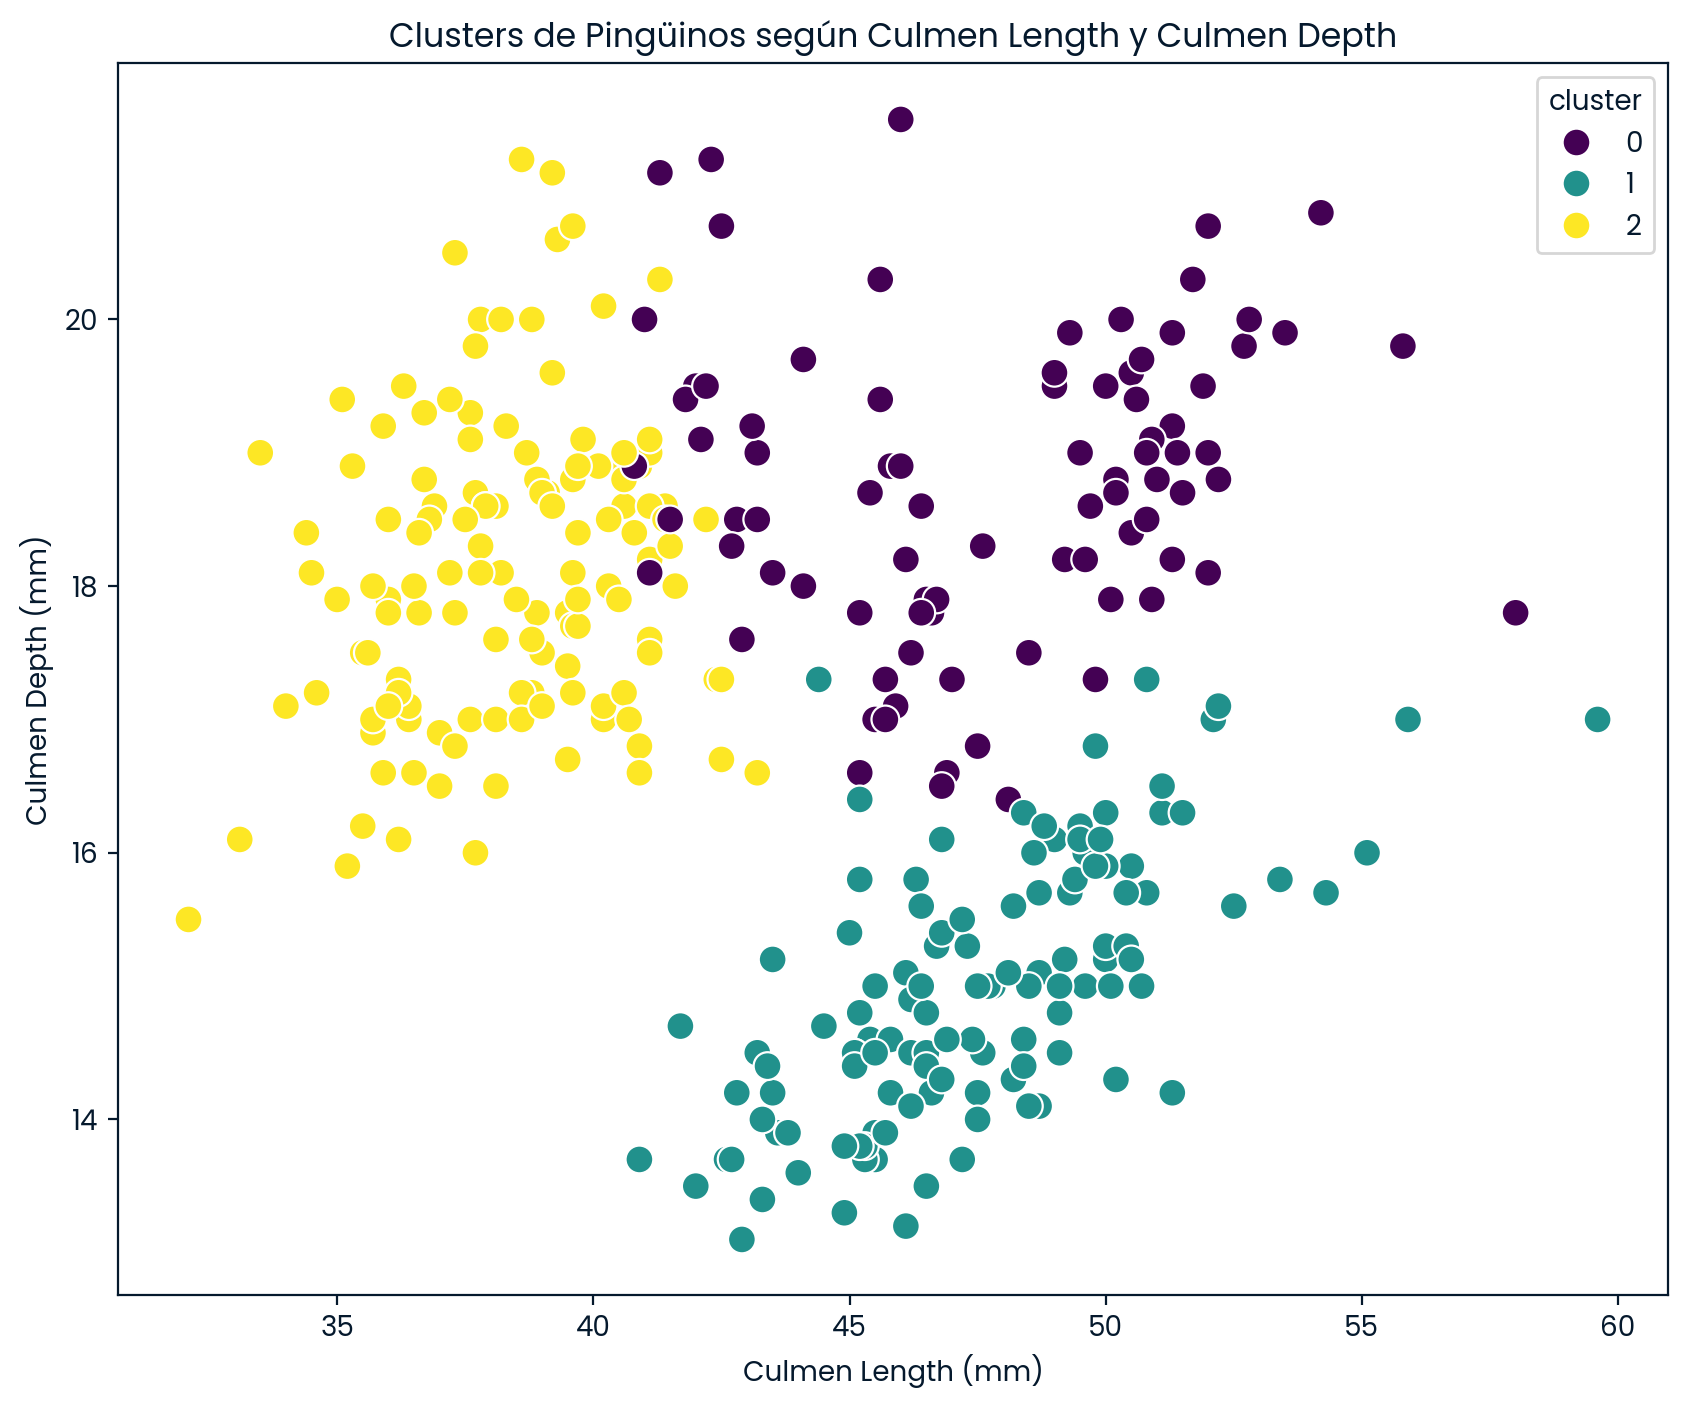

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos dos variables para graficar
plt.figure(figsize=(10, 8))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='cluster', data=penguins_df, palette='viridis', s=100)

# Títulos y etiquetas
plt.title('Clusters de Pingüinos según Culmen Length y Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')

plt.show()
